In [1]:
import numpy as np

# Assignment 3

## Student Dataset

Load the dataset and perform the following three tasks


### Linear Regression

Your target attribute is G3

1. Select the top 8 numerical features $(x_1, \ldots, x_8)$  which are more correlated to the target attribute.
2. Define your features matrix $X = [x_1, \ldots, x_8]$ and target vector $y.$
3. Split the dataset into train (75%) and test (25%) using random state 100.
4. Train your Linear regression model on the training datset
5. Find the coefficients and the $y$ intercept.
6. Evaluate your model on the test dataset.
7. Get the $r^2$ score and interprete the result.
8. Use the $(y_{test}, y_{pred})$ plot to visualize the goodness of fit of your model.



### Polynomial regression
1. First reduce your feature matrix $X$ to the feature vector $x_1$ which is the most correlated to the target feature G3. Named the split  $x_{train}$ and $x_{test}.$  

1.
* (a) Print the coefficients of the best polynomial of order 1 ($poly_1$) which fits the dataset $x_{train},$ and

* (b) print the $r^2$ score ($r_1$) using $x_{test}$.

2. Now varry the (hyperparameter) degree of the polynomial from 1 to 8 and find the $r^2$ scores ($r_n$) for each polynomial ($poly_n$)

3. Based on the $r^2$ scores on $x_{test},$ find the degree ($n_{opt}$) which best fit the dataset.

4. Plot $(x_{test}, y_{pred})$ for the best polynomial.

### Binary classification

1. Your target variable is G3. Group the students in to two groups (pass or fail) based on G3
     * pass if G3≥10,
     * fail; otherwise
  
2. Split the dataset into train (75%) and test (25%) using random state 100.

3. Predict the calss of the students in the test dataset with four different classification techniques.

4. Evaluate the prformance of each model using four different metrics.

4. Display your results in a table whose rows are the metrics and columns are the model names.

$\textbf{Linear Regression}$\
$\textbf{Your target attribute is G3}$\

1. Select the top 8 numerical features  (𝑥1,…,𝑥8)which are more correlated to the target attribute.\
2. Define your features matrix  $𝑋=[𝑥1,…,𝑥8]$ and target vector  𝑦.\
3. Split the dataset into train (75%) and test (25%) using random state 100.\
4. Train your Linear regression model on the training datset\
5. Find the coefficients and the  $𝑦$ intercept.\
6. Evaluate your model on the test dataset.\
7. Get the  $𝑟^2$ score and interprete the result.\
8. Use the $ (𝑦_{𝑡𝑒𝑠𝑡},𝑦_{𝑝𝑟𝑒𝑑})$ plot to visualize the goodness of fit of your model.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sklearn

import sklearn.metrics as metrics
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

In [3]:
G3 = pd.read_csv('student-mat.csv', header='infer',delimiter=';')
G3

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
G3.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
print(list(G3.columns))


['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [6]:
G3.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [7]:
G3.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
G3.shape

(395, 33)

In [9]:
import numpy as np
G3 = G3.replace("?", np.nan)
G3

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [10]:
dataClean = G3.dropna()
dataClean

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [11]:
G3.iloc[0]

school             GP
sex                 F
age                18
address             U
famsize           GT3
Pstatus             A
Medu                4
Fedu                4
Mjob          at_home
Fjob          teacher
reason         course
guardian       mother
traveltime          2
studytime           2
failures            0
schoolsup         yes
famsup             no
paid               no
activities         no
nursery           yes
higher            yes
internet           no
romantic           no
famrel              4
freetime            3
goout               4
Dalc                1
Walc                1
health              3
absences            6
G1                  5
G2                  6
G3                  6
Name: 0, dtype: object

In [12]:
G3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [13]:
# Display the first few rows of the dataset
#print("First few rows of the dataset:")
G3.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [14]:
# Summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(G3.describe())


Summary statistics of the dataset:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.5

In [15]:
G3.describe()#.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [16]:
G3.drop(['G1', 'G2'], axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,10


In [17]:
# Select numerical columns only
numerical_columns = G3.select_dtypes(include=np.number)
numerical_columns

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


In [18]:
G3.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [19]:
# Calculate correlation matrix with the target attribute (G3)
correlation_matrix = numerical_columns.corr().abs()
correlation_matrix

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,0.163658,0.163438,0.070641,0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,0.062187,0.175230,0.064081,0.143474,0.161579
Medu,0.163658,1.000000,0.623455,0.171639,0.064944,0.236680,0.003914,0.030891,0.064094,0.019834,0.047123,0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,0.163438,0.623455,1.000000,0.158194,0.009175,0.250408,0.001370,0.012846,0.043105,0.002386,0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,0.171639,0.158194,1.000000,0.100909,0.092239,0.016808,0.017025,0.028540,0.138325,0.134116,0.007501,0.012944,0.093040,0.153198,0.117142
studytime,0.004140,0.064944,0.009175,0.100909,1.000000,0.173563,0.039731,0.143198,0.063904,0.196019,0.253785,0.075616,0.062700,0.160612,0.135880,0.097820
failures,0.243665,0.236680,0.250408,0.092239,0.173563,1.000000,0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,0.354718,0.355896,0.360415
famrel,0.053940,0.003914,0.001370,0.016808,0.039731,0.044337,1.000000,0.150701,0.064568,0.077594,0.113397,0.094056,0.044354,0.022168,0.018281,0.051363
freetime,0.016434,0.030891,0.012846,0.017025,0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,0.058078,0.012613,0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,0.009577,0.044302,0.149104,0.162250,0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,0.196019,0.136047,0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,0.094159,0.064120,0.054660


In [20]:
# Get the correlation of features with the target attribute
target_correlation = correlation_matrix["G3"].sort_values(ascending=False)
target_correlation

G3            1.000000
G2            0.904868
G1            0.801468
failures      0.360415
Medu          0.217147
age           0.161579
Fedu          0.152457
goout         0.132791
traveltime    0.117142
studytime     0.097820
health        0.061335
Dalc          0.054660
Walc          0.051939
famrel        0.051363
absences      0.034247
freetime      0.011307
Name: G3, dtype: float64

In [21]:
G3.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

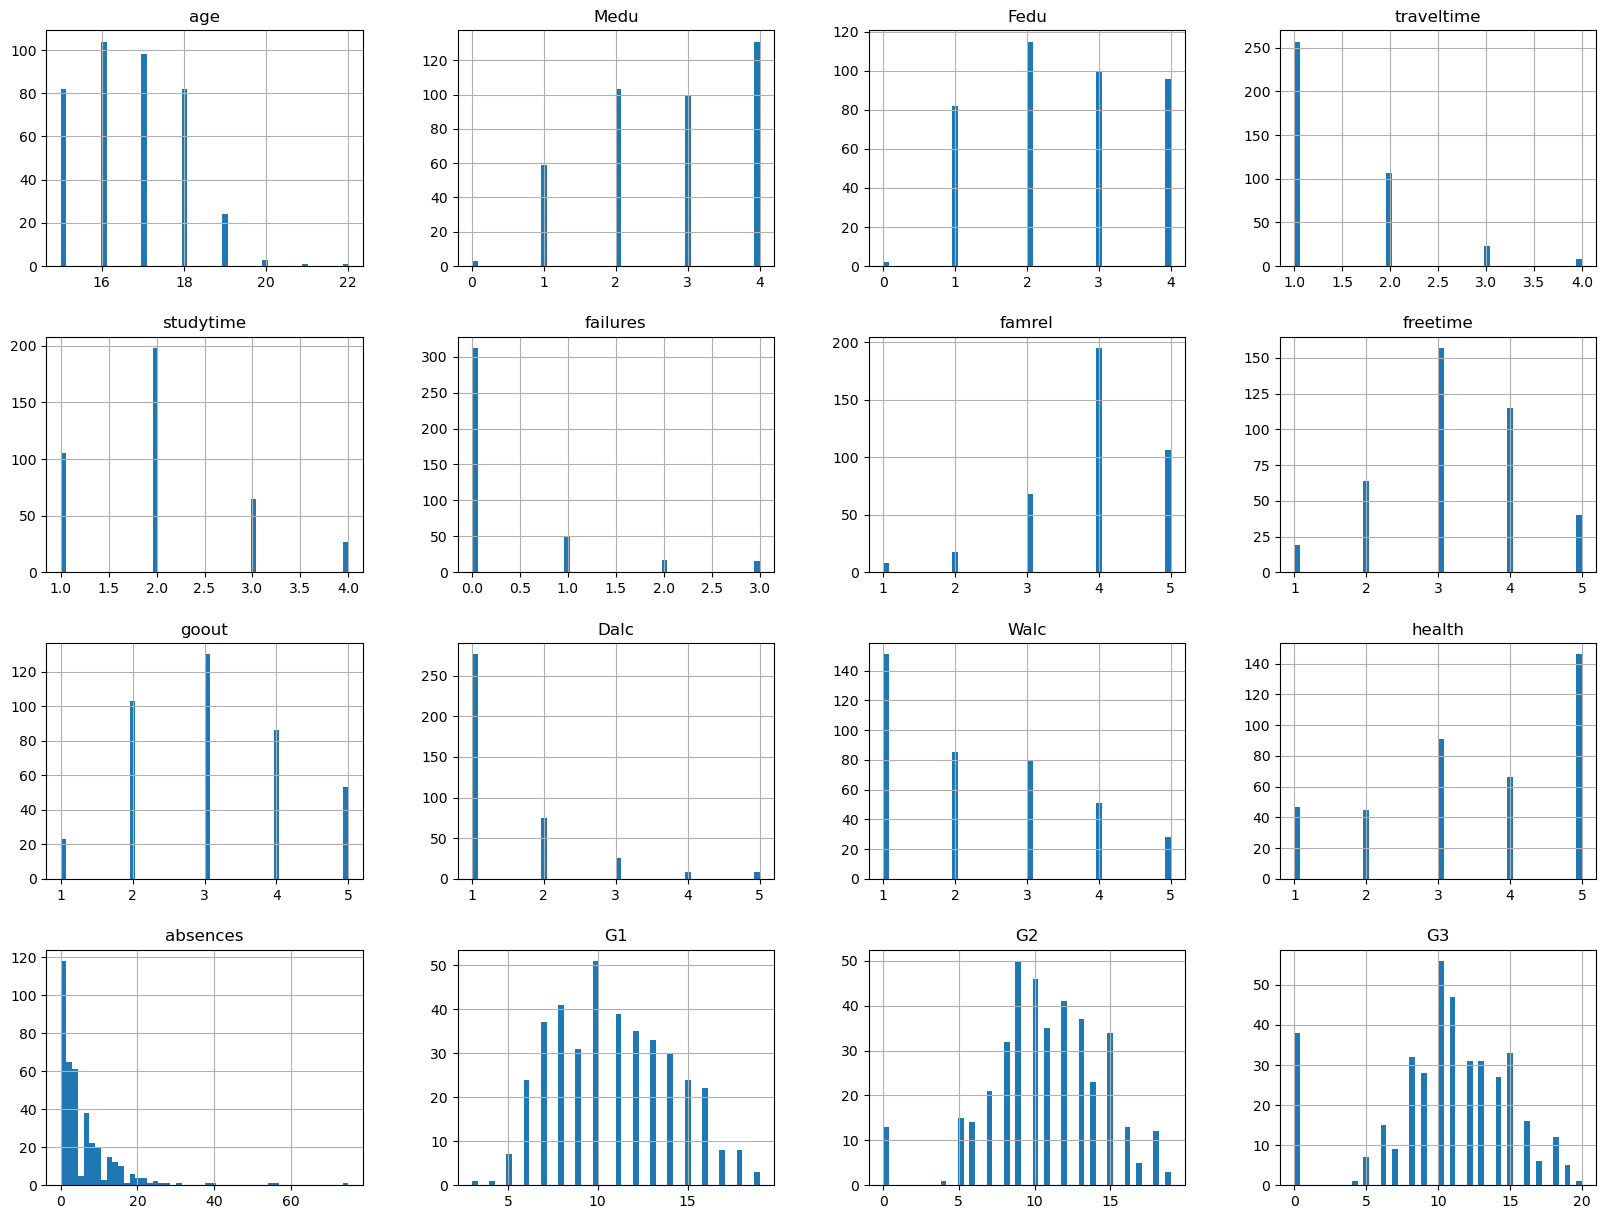

In [22]:
# A histogram for each numerical attribute
%matplotlib inline 
import matplotlib.pyplot as plt
G3.hist(bins=50, figsize=(20,15))
plt.show()


In [23]:
# Select the top 8 numerical features correlated with the target attribute
top_8_features = target_correlation[1:9]  # Exclude the target itself
top_8_features

G2            0.904868
G1            0.801468
failures      0.360415
Medu          0.217147
age           0.161579
Fedu          0.152457
goout         0.132791
traveltime    0.117142
Name: G3, dtype: float64

In [24]:
# Select the top 8 numerical features correlated with the target attribute
top_8_features = target_correlation[1:9]  # Exclude the target itself
top_8_feature_names = top_8_features.index.tolist()

print("Top 8 numerical features correlated with the target attribute (G3):")
print(top_8_feature_names)

Top 8 numerical features correlated with the target attribute (G3):
['G2', 'G1', 'failures', 'Medu', 'age', 'Fedu', 'goout', 'traveltime']


In [25]:
len(top_8_feature_names)

8

In [26]:
 # Define the features matrix X containing the top 8 numerical features
top_8_features = ['failures', 'Medu', 'age', 'Fedu', 'goout', 'traveltime', 'studytime', 'health']
X = G3[top_8_feature_names]
X.head()

,G2,G1,failures,Medu,age,Fedu,goout,traveltime
0,6,5,0,4,18,4,4,2
1,5,5,0,1,17,1,3,1
2,8,7,3,1,15,1,2,1
3,14,15,0,4,15,2,2,1
4,10,6,0,3,16,3,2,1


In [27]:
# Define the target vector y
y = G3["G3"]
y.head()


0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

In [28]:
import numpy as np
X = np.array(X)
y = np.array(y)

print("Features Matrix X:")
print(X)
print("\nTarget Vector y:")
print(y)

Features Matrix X:
[[ 6  5  0 ...  4  4  2]
 [ 5  5  0 ...  1  3  1]
 [ 8  7  3 ...  1  2  1]
 ...
 [ 8 10  3 ...  1  3  1]
 [12 11  0 ...  2  1  3]
 [ 9  8  0 ...  1  3  1]]

Target Vector y:
[ 6  6 10 15 10 15 11  6 19 15  9 12 14 11 16 14 14 10  5 10 15 15 16 12
  8  8 11 15 11 11 12 17 16 12 15  6 18 15 11 13 11 12 18 11  9  6 11 20
 14  7 13 13 10 11 13 10 15 15  9 16 11 11  9  9 10 15 12  6  8 16 15 10
  5 14 11 10 10 11 10  5 12 11  6 15 10  8  6 14 10  7  8 18  6 10 14 10
 15 10 14  8  5 17 14  6 18 11  8 18 13 16 19 10 13 19  9 16 14 13  8 13
 15 15 13 13  8 12 11  9  0 18  0  0 12 11  0  0  0  0 12 15  0  9 11 13
  0 11  0 11  0 10  0 14 10  0 12  8 13 10 15 12  0  7  0 10  7 12 10 16
  0 14  0 16 10  0  9  9 11  6  9 11  8 12 17  8 12 11 11 15  9 10 13  9
  8 10 14 15 16 10 18 10 16 10 10  6 11  9  7 13 10  7  8 13 14  8 10 15
  4  8  8 10  6  0 17 13 14  7 15 12  9 12 14 11  9 13  6 10 13 12 11  0
 12 12  0 12  0 18 13  8  5 15  8 10  8  8 12  8 13 11 14  0 18  8 12  9
  0 

In [29]:
# Split the dataset into train (75%) and test (25%) using random state 100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

# Display the shapes of the train and test sets
print("Train set shape - X_train:", X_train.shape, "y_train:", y_train.shape)
print("Test set shape - X_test:", X_test.shape, "y_test:", y_test.shape)

Train set shape - X_train: (296, 8) y_train: (296,)
Test set shape - X_test: (99, 8) y_test: (99,)


In [30]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training dataset
model.fit(X_train, y_train)

# Optionally, you may want to print the coefficients and intercept of the trained model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 0.96503825  0.19505323 -0.16885076  0.06056801 -0.18769732 -0.0122284
  0.17940529  0.01632778]
Intercept: 0.3175585702948993


In [31]:
# Get the coefficients (weights) of the features
coefficients = model.coef_

# Get the intercept (bias) of the model
intercept = model.intercept_

print("Coefficients (Weights):", coefficients)
print("Intercept (Bias):", intercept)

Coefficients (Weights): [ 0.96503825  0.19505323 -0.16885076  0.06056801 -0.18769732 -0.0122284
  0.17940529  0.01632778]
Intercept (Bias): 0.3175585702948993


In [32]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

print("R^2 Score:", r2)

R^2 Score: 0.7659810921561301


In [33]:
# Interpretation of the R^2 score
print("\nInterpretation of R^2 Score:")
print("R^2 score ranges from 0 to 1.")
print("A higher R^2 score indicates a better fit of the model to the data.")
print("R^2 score of 1 indicates that the model perfectly predicts the target variable.")
print("R^2 score of 0 indicates that the model does not explain any of the variability of the target variable.")
print("R^2 score below 0 indicates that the model is worse than predicting the mean of the target variable.")


Interpretation of R^2 Score:
R^2 score ranges from 0 to 1.
A higher R^2 score indicates a better fit of the model to the data.
R^2 score of 1 indicates that the model perfectly predicts the target variable.
R^2 score of 0 indicates that the model does not explain any of the variability of the target variable.
R^2 score below 0 indicates that the model is worse than predicting the mean of the target variable.


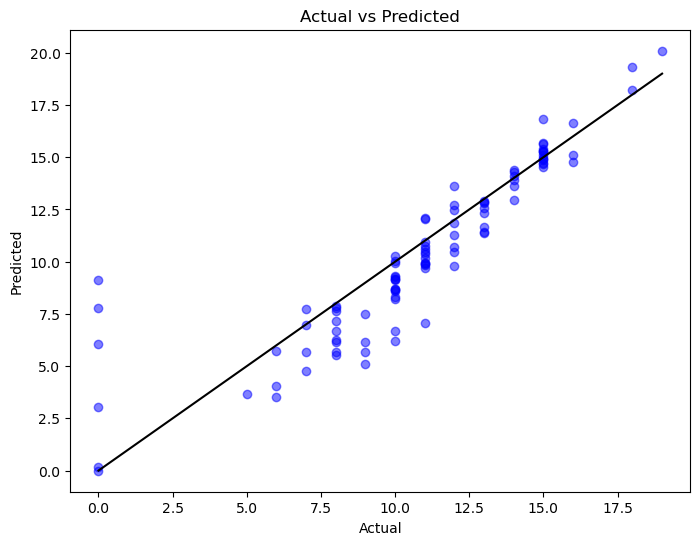

In [34]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='k', ms = 6) 
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [35]:
from mpl_toolkits import mplot3d


$\textbf{Polynomial regression}$
1. First reduce your feature matrix  𝑋 to the feature vector  $𝑥_1$ which is the most correlated to the target feature G3. Named the split $𝑥_{𝑡𝑟𝑎𝑖𝑛}
  and  𝑥_{𝑡𝑒𝑠𝑡}.$ 

2. (a) Print the coefficients of the best polynomial of order 1 $( 𝑝𝑜𝑙𝑦_1)$ which fits the dataset  𝑥𝑡𝑟𝑎𝑖𝑛, and

(b) print the  $𝑟^2$ score $( 𝑟_1)$ using  $𝑥_{𝑡𝑒𝑠𝑡}$
 

2. Now varry the (hyperparameter) degree of the polynomial from 1 to 8 and find the  $𝑟^2$ scores $(𝑟_𝑛)$ for each polynomial $( 𝑝𝑜𝑙𝑦_𝑛)$

3. Based on the  $𝑟^2$ scores on  $𝑥_{𝑡𝑒𝑠𝑡}$, find the degree $(𝑛_{𝑜𝑝𝑡})$ which best fit the dataset.

4. Plot  $(𝑥_{𝑡𝑒𝑠𝑡},𝑦_{𝑝𝑟𝑒𝑑})$ for the best polynomial.

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt



In [37]:
G3 = pd.read_csv('student-mat.csv', header='infer',delimiter=';')
G3

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [38]:
G3.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [39]:
G3.head().describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000
mean,16.20000,2.600000,2.20000,1.200000,2.200000,0.600000,4.000000,2.800000,2.600000,1.200000,1.600000,3.800000,5.20000,7.600000,8.600000,9.400000
std,1.30384,1.516575,1.30384,0.447214,0.447214,1.341641,0.707107,0.447214,0.894427,0.447214,0.894427,1.095445,3.03315,4.219005,3.577709,3.714835
min,15.00000,1.000000,1.00000,1.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.00000,5.000000,5.000000,6.000000
25%,15.00000,1.000000,1.00000,1.000000,2.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,4.00000,5.000000,6.000000,6.000000
50%,16.00000,3.000000,2.00000,1.000000,2.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,4.00000,6.000000,8.000000,10.000000
75%,17.00000,4.000000,3.00000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,5.000000,6.00000,7.000000,10.000000,10.000000
max,18.00000,4.000000,4.00000,2.000000,3.000000,3.000000,5.000000,3.000000,4.000000,2.000000,3.000000,5.000000,10.00000,15.000000,14.000000,15.000000


In [40]:
G3_cl= G3.dropna()

In [41]:
G3_cl.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [42]:
G3_cl.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [43]:
G3_cl.shape

(395, 33)

In [44]:
#type(dt_cl.loc[0,0])

In [45]:
type(G3_cl.iloc[0,0])

str

In [46]:
col2UniqVals = pd.unique(G3_cl.loc[0]).tolist()
col2UniqVals

['GP',
 'F',
 18,
 'U',
 'GT3',
 'A',
 4,
 'at_home',
 'teacher',
 'course',
 'mother',
 2,
 0,
 'yes',
 'no',
 3,
 1,
 6,
 5]

In [47]:
#def & lambda
# Lambda format
f1 = lambda x: len(pd.unique(x))
# def format
def f2(x):
    y = pd.unique(x)
    return len(y)
def f2(x):
    return len(pd.unique(x))

In [48]:
# Unique values per column using apply
G3_cl.apply(lambda x: len(pd.unique(x)))

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [49]:
G3_cl.iloc[:, 7].unique()

array([4, 1, 2, 3, 0], dtype=int64)

In [50]:
col0Dummied = pd.get_dummies(G3_cl.iloc[0])
col0Dummied.head()

,0,1,2,3,4,5,6,18,A,F,GP,GT3,U,at_home,course,mother,no,teacher,yes
school,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
sex,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
age,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
address,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
famsize,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [51]:
X = G3_cl.corr() 
X  

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [52]:
# Step 1: Reduce feature matrix X to the most correlated feature x1
correlation_matrix = G3_cl.corr()
most_correlated_feature = correlation_matrix['G3'].sort_values(ascending=False).index[1]  # Exclude 'G3' itself
x_train = G3_cl[[most_correlated_feature]]
x_test = G3_cl['G3']

In [53]:
# Step 2(a): Fit polynomial of order 1 and print coefficients
degree = 1
poly_features = PolynomialFeatures(degree)
x_poly = poly_features.fit_transform(x_train)
model = LinearRegression()
model.fit(x_poly, x_test)
coefficients = model.coef_
print(f"Coefficients of the best polynomial of order 1 (poly_1): {coefficients}")

Coefficients of the best polynomial of order 1 (poly_1): [0.         1.10211236]


In [54]:
# Step 2(b): Print R^2 score for polynomial of order 1
y_pred = model.predict(x_poly)
r2_1 = r2_score(x_test, y_pred)
print(f"R^2 score using x_test for polynomial of order 1 (r1): {r2_1}")

R^2 score using x_test for polynomial of order 1 (r1): 0.818786078004268


In [55]:
# Step 3: Vary polynomial degree and find R^2 scores
r2_scores = []
degrees = list(range(1, 9))
for degree in degrees:
    poly_features = PolynomialFeatures(degree)
    x_poly = poly_features.fit_transform(x_train)
    model.fit(x_poly, x_test)
    y_pred = model.predict(x_poly)
    r2 = r2_score(x_test, y_pred)
    r2_scores.append(r2)

In [56]:
# Step 4: Find the degree which best fits the dataset
best_degree = degrees[np.argmax(r2_scores)]
print(f"The best polynomial degree based on R^2 scores: {best_degree}")


The best polynomial degree based on R^2 scores: 8


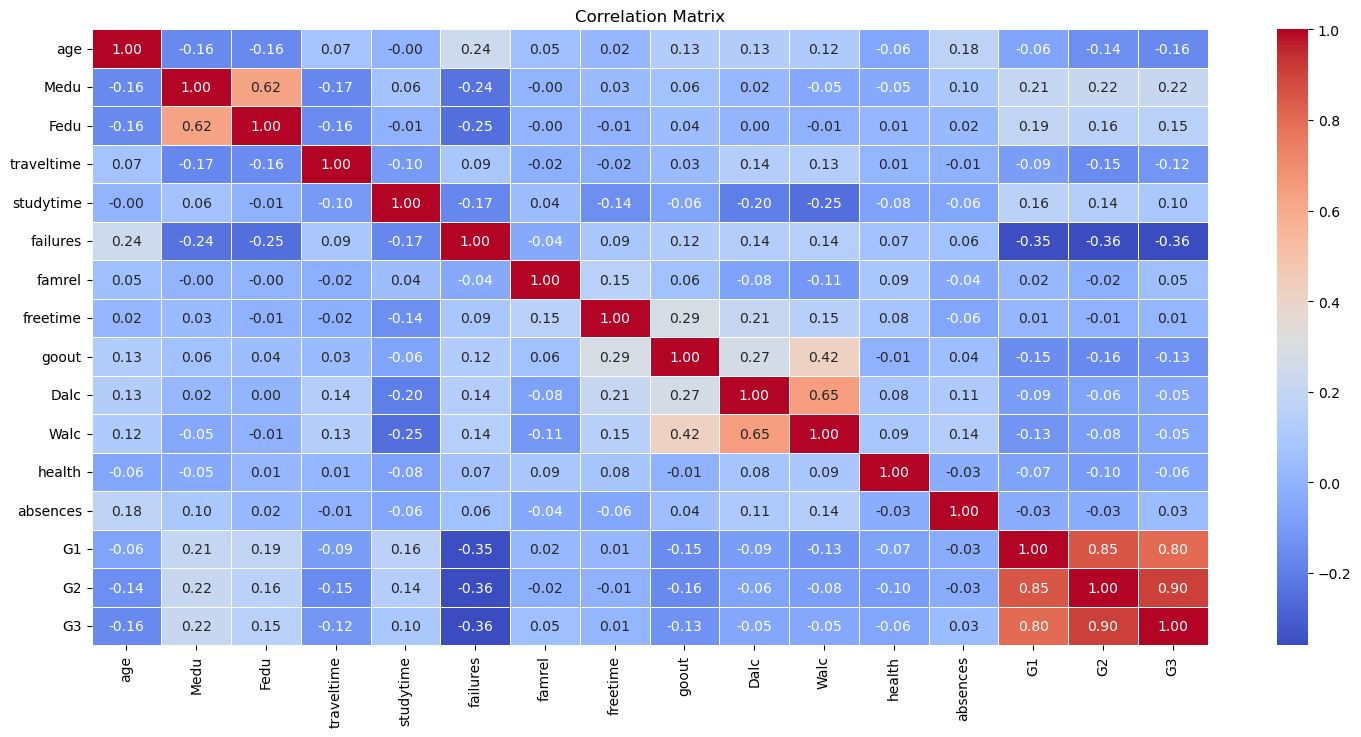

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
correlation_matrix = G3_cl.corr()


# Plot the correlation matrix using a heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix") 
plt.show()

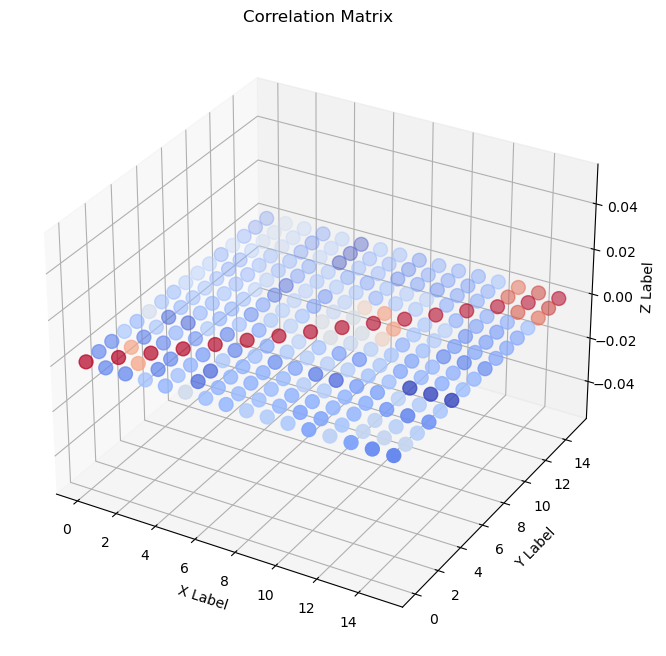

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Assuming G3_cl is your correlation matrix
correlation_matrix = G3_cl.corr()

# Create figure and 3D axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for X, Y
X, Y = np.meshgrid(np.arange(correlation_matrix.shape[0]), np.arange(correlation_matrix.shape[1]))

# Flatten X, Y and Z for plotting
X = X.flatten()
Y = Y.flatten()
Z = np.zeros_like(X)

# Flatten correlation values for coloring
values = correlation_matrix.values.flatten()

# Plot the correlation matrix using a 3D scatter plot
ax.scatter(X, Y, Z, c=values, cmap='coolwarm', s=100)

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Correlation Matrix')

# Show plot
plt.show()

In [59]:
 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.tri import Triangulation




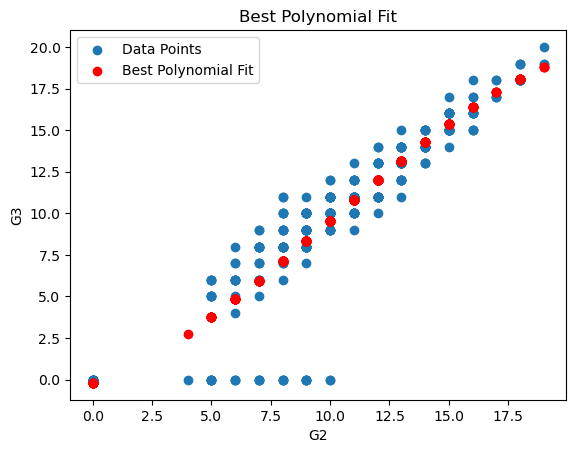

In [60]:
# Plotting
poly_features = PolynomialFeatures(3, include_bias=False)          
x_poly = poly_features.fit_transform(x_train)
model.fit(x_poly, x_test)
y_pred = model.predict(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, x_test)
plt.scatter(x_train, x_test, label='Data Points')

plt.scatter(x_train, y_pred, color='red', label='Best Polynomial Fit')
plt.xlabel(most_correlated_feature)
plt.ylabel('G3')
plt.title('Best Polynomial Fit')
plt.legend()
#plt.grid(True)
plt.show()

$\textbf{Binary classification}$
1. Your target variable is G3. Group the students in to two groups (pass or fail) based on G3

(a). pass if G3≥10,
(b). fail; otherwise
2. Split the dataset into train (75%) and test (25%) using random state 100.

3. Predict the calss of the students in the test dataset with four different classification techniques.

4. Evaluate the prformance of each model using four different metrics.

5. Display your results in a table whose rows are the metrics and columns are the model names.

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# MODELS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# METRICS
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [62]:
G3 = pd.read_csv('student-mat.csv', header='infer',delimiter=';')
G3

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [63]:
G3.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [64]:
G3_cl= G3.dropna()

In [65]:
G3_cl#.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [66]:
G3_cl.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [67]:
def pass_fail(row):
    if row['G3'] >= 10:
        return 'pass'
    else:
        return 'fail'


In [68]:
# Group students into pass or fail based on G3
G3_cl['pass_fail'] = G3_cl['G3'].apply(lambda x: 'pass' if x >= 10 else 'fail')
G3_cl['pass_fail']

0      fail
1      fail
2      pass
3      pass
4      pass
       ... 
390    fail
391    pass
392    fail
393    pass
394    fail
Name: pass_fail, Length: 395, dtype: object

In [69]:
G3_cl['pass_fail'].head()

0    fail
1    fail
2    pass
3    pass
4    pass
Name: pass_fail, dtype: object

In [70]:
G3_cl['Class'] = G3_cl.apply(pass_fail, axis=1)

In [76]:
# Step 2: Split dataset into train and test
X = G3_cl.drop(['G1', 'G2',], axis=1)  # Features
y = G3_cl['Class']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
#X_train, X_test, y_train, y_test

In [81]:
y.shape

(395,)

In [82]:
X.shape

(395, 33)

In [83]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

In [84]:
models = [] # ['name', 'model']
models.append(('KNN', KNeighborsClassifier(n_neighbors=9)))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(kernel='linear'))) 
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('DT', DecisionTreeClassifier()))

In [85]:
models

[('KNN', KNeighborsClassifier(n_neighbors=9)),
 ('GNB', GaussianNB()),
 ('SVC', SVC(kernel='linear')),
 ('LR', LogisticRegression(solver='liblinear')),
 ('DT', DecisionTreeClassifier())]

In [86]:
 #  4: Train and evaluate models
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='pass')
    recall = recall_score(y_test, y_pred, pos_label='pass')
    f1 = f1_score(y_test, y_pred, pos_label='pass')
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

ValueError: could not convert string to float: 'GP'

In [87]:
#Display Results in a Table:
import pandas as pd

results_df = pd.DataFrame(results).T
results_df.index.name = "Model"
print(results_df)


Empty DataFrame
Columns: []
Index: []
